In [1]:
!pip uninstall -y scikit-learn imbalanced-learn
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl.metadata (8.2 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl (8.4 MB)
Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score,classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('details.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
legal_transaction = data[data.Class == 0]
fraud_transaction = data[data.Class == 1]

In [8]:
print(legal_transaction.shape)
print(fraud_transaction.shape)
data.groupby('Class').mean()

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [9]:
legal_sample = legal_transaction.sample(n=492*2)
legal_sample.shape

(984, 31)

In [10]:
new_dataset = pd.concat([legal_sample, fraud_transaction])

In [11]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
105770,69676.0,0.938923,-1.126286,0.094664,-0.472012,-1.234788,-0.855655,-0.129161,-0.213155,-1.244797,...,-0.193019,-0.583959,-0.129439,0.590811,0.142844,0.987157,-0.108798,0.033692,219.90,0
176846,122937.0,2.088560,0.240862,-1.743443,0.368982,0.595558,-0.764593,0.259522,-0.292029,0.329754,...,-0.362135,-0.878295,0.307377,0.410527,-0.197810,0.177566,-0.055179,-0.029706,0.89,0
215333,140027.0,0.149840,0.378815,-0.442694,-2.086742,1.362659,-0.543973,1.219464,-0.546969,-2.050884,...,0.369832,1.212776,-0.638280,-1.071788,0.363436,0.145359,-0.078549,-0.115492,1.00,0
233197,147482.0,2.113497,0.575076,-2.803749,0.521834,1.098028,-1.120490,0.360367,-0.336214,0.531613,...,0.037974,0.341018,-0.174126,-1.269175,0.393307,-0.033532,0.023942,-0.002685,1.00,0
45441,42346.0,-1.182516,1.899580,0.820226,0.281341,-0.715190,-0.160012,-0.842117,-4.988322,-0.040217,...,4.442506,-1.961059,0.496077,0.833200,0.959819,-0.621654,0.351216,0.247189,39.95,0


In [12]:
new_dataset['Class'].value_counts()

Class
0    984
1    492
Name: count, dtype: int64

In [13]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93868.201220,0.011064,-0.074173,-0.012149,-0.050127,0.034132,-0.065561,0.064250,0.009677,-0.034082,...,-0.013488,-0.013993,-0.012609,-0.024010,0.010332,0.016701,0.009511,-0.014773,0.004696,88.446260
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [15]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
105770   69676.0  0.938923 -1.126286  0.094664 -0.472012 -1.234788 -0.855655   
176846  122937.0  2.088560  0.240862 -1.743443  0.368982  0.595558 -0.764593   
215333  140027.0  0.149840  0.378815 -0.442694 -2.086742  1.362659 -0.543973   
233197  147482.0  2.113497  0.575076 -2.803749  0.521834  1.098028 -1.120490   
45441    42346.0 -1.182516  1.899580  0.820226  0.281341 -0.715190 -0.160012   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(1476, 30) (1180, 30) (296, 30)


In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train, Y_train)

/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

LogisticRegression()

In [20]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

In [21]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9559322033898305


In [22]:
y_pred = model.predict(X_test)
LR_test_data_accuracy = accuracy_score(Y_test,y_pred)
LR_precision = precision_score(Y_test, y_pred)
LR_f1 = f1_score(Y_test, y_pred)
LR_recall = recall_score(Y_test,y_pred)
classification_rep = classification_report(Y_test, y_pred)


/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

In [23]:
print("Logistic Regression : ")
print("Accuracy : ",LR_test_data_accuracy)
print("Precision : ",LR_precision)
print("F1 : ",LR_f1)
print("Recall : ",LR_recall)
print(f'Classification Report:\n{classification_rep}')

Logistic Regression : 
Accuracy :  0.9324324324324325
Precision :  0.912621359223301
F1 :  0.903846153846154
Recall :  0.8952380952380953
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       191
           1       0.91      0.90      0.90       105

    accuracy                           0.93       296
   macro avg       0.93      0.92      0.93       296
weighted avg       0.93      0.93      0.93       296



/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

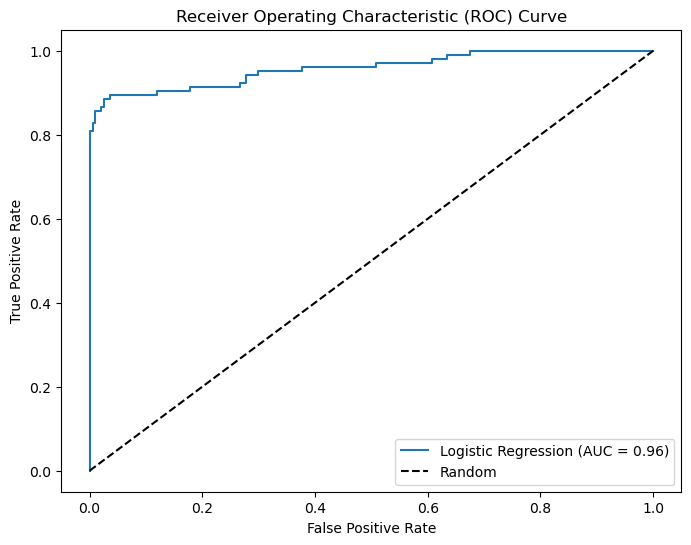

In [24]:

y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_probabilities)
auc = roc_auc_score(Y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()